C:\Users\L13\AppData\Local\Temp\ipykernel_2572\3671292681.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')


Valeurs manquantes : CO2          0
month        0
year         0
quarter      0
sin_month    0
cos_month    0
dtype: int64


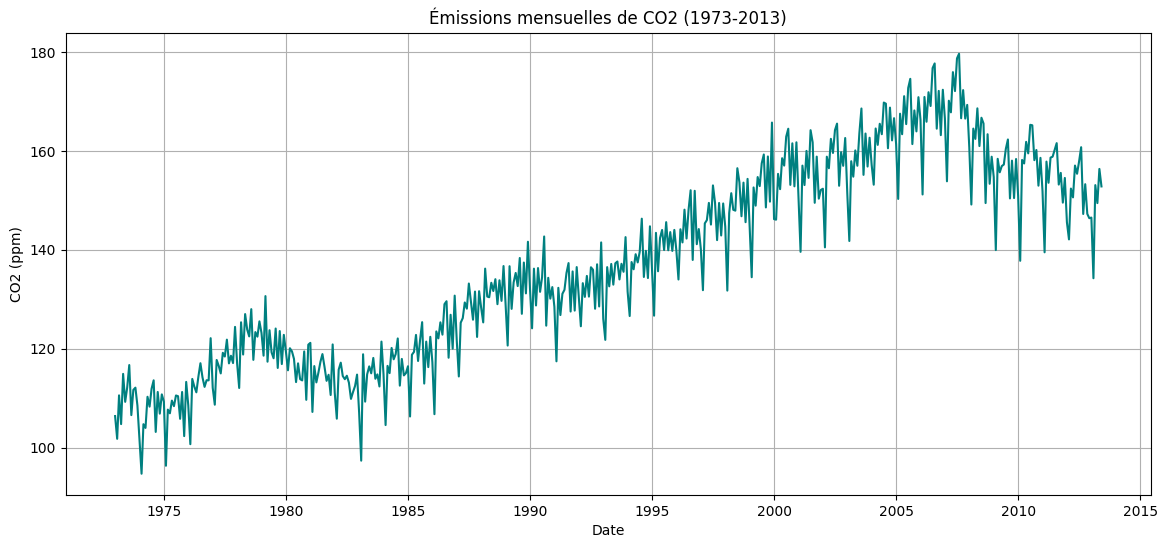

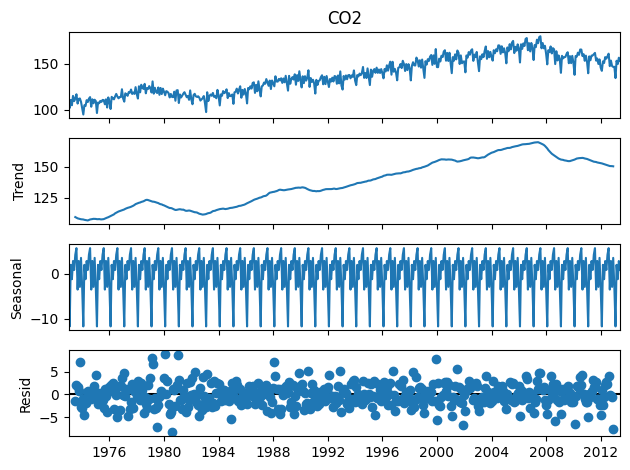

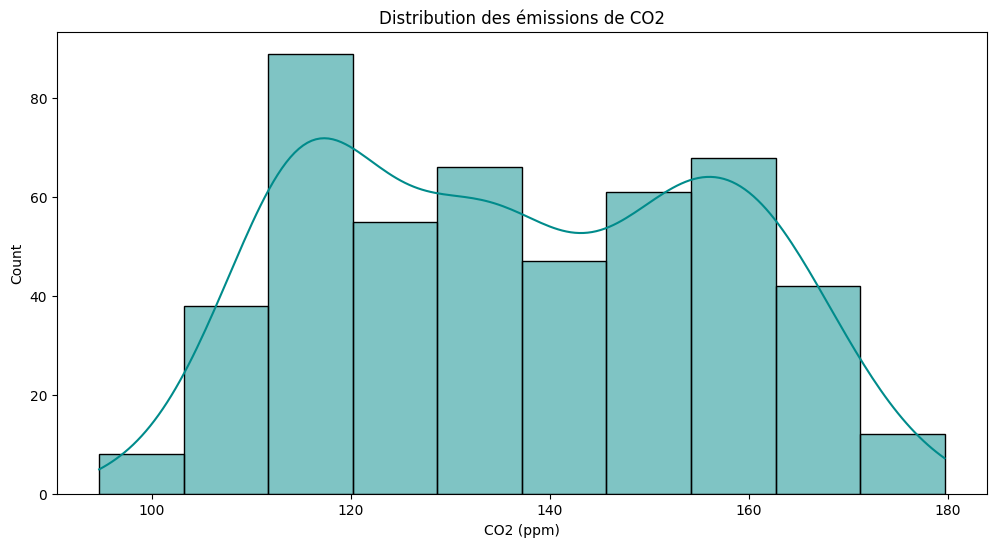

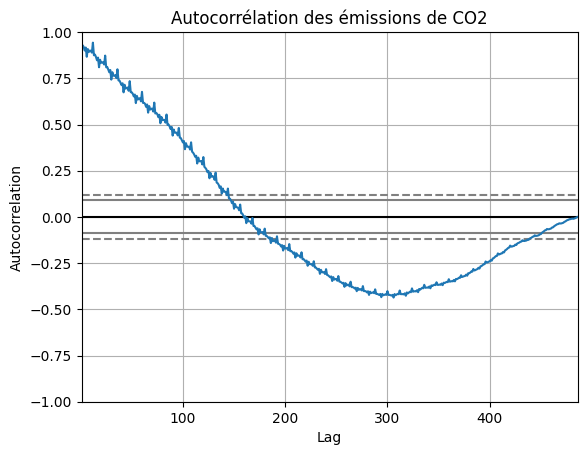


Split des données :
Train : 1973-01 à 2001-04
Val   : 2001-05 à 2007-04
Test  : 2007-05 à 2013-06


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# Chargement des données
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.columns = ['CO2']  # Simplification du nom de colonne

# 🆕 Extraction des caractéristiques temporelles
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

# Vérification des valeurs manquantes
print("Valeurs manquantes :", df.isnull().sum())

# Remplissage des valeurs manquantes (si nécessaire)
df['CO2'] = df['CO2'].interpolate(method='time')

# Exploration visuelle
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['CO2'], color='teal')
plt.title('Émissions mensuelles de CO2 (1973-2013)')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.show()

# Décomposition saisonnière
result = seasonal_decompose(df['CO2'], model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()

# Distribution des données
plt.figure(figsize=(12, 6))
sns.histplot(df['CO2'], kde=True, color='darkcyan')
plt.title('Distribution des émissions de CO2')
plt.xlabel('CO2 (ppm)')
plt.show()

# Autocorrélation
autocorrelation_plot(df['CO2'])
plt.title('Autocorrélation des émissions de CO2')
plt.show()

# Division des données (70% train, 15% validation, 15% test)
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))

train = df.iloc[:train_size]
val = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

# Normalisation (pour modèles sensibles à l'échelle)
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[['CO2']]), index=train.index, columns=['CO2'])
val_scaled = pd.DataFrame(scaler.transform(val[['CO2']]), index=val.index, columns=['CO2'])
test_scaled = pd.DataFrame(scaler.transform(test[['CO2']]), index=test.index, columns=['CO2'])

# Affichage des splits
print("\nSplit des données :")
print(f"Train : {train.index[0].strftime('%Y-%m')} à {train.index[-1].strftime('%Y-%m')}")
print(f"Val   : {val.index[0].strftime('%Y-%m')} à {val.index[-1].strftime('%Y-%m')}")
print(f"Test  : {test.index[0].strftime('%Y-%m')} à {test.index[-1].strftime('%Y-%m')}")

# Sauvegarde des données prétraitées (optionnel)
train_scaled.to_csv('train_scaled.csv')
val_scaled.to_csv('val_scaled.csv')
test_scaled.to_csv('test_scaled.csv')


Epoch 1/100


C:\Users\L13\AppData\Local\Temp\ipykernel_23876\1674719784.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
C:\Users\L13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0421 - mae: 0.1598 - val_loss: 0.0357 - val_mae: 0.1769
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - mae: 0.0629 - val_loss: 0.0059 - val_mae: 0.0679
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0051 - val_mae: 0.0620
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mae: 0.0473 - val_loss: 0.0058 - val_mae: 0.0671
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mae: 0.0482 - val_loss: 0.0053 - val_mae: 0.0635
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0037 - val_mae: 0.0503
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033 - mae: 0.0464 - val_loss: 0.0045 - val_mae: 0.0585
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - mae: 0.0459 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0028 - ma

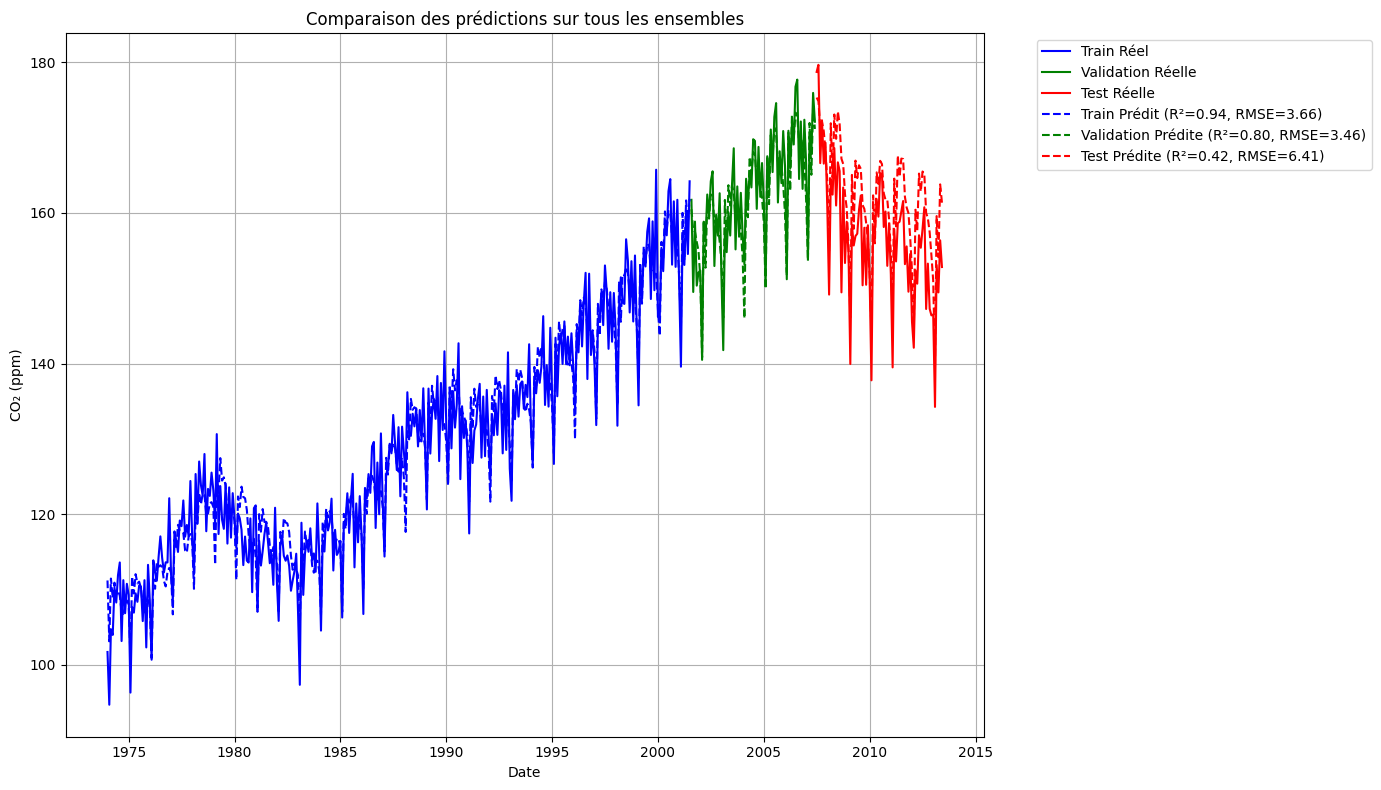

In [18]:
# LSTM version Keras via tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 1. Chargement et préparation des données
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
df.columns = ['CO2']
df.sort_index(inplace=True)

# 2. Extraction des features temporelles
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Gestion des valeurs manquantes
df['CO2'] = df['CO2'].interpolate(method='time')

# 4. Normalisation des colonnes utiles pour LSTM
features = ['CO2', 'sin_month', 'cos_month', 'quarter', 'year']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

# 5. Création des séquences pour LSTM
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_df.values, window_size)

# 6. Split train/val/test
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 7. Construction du modèle LSTM
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 8. Entraînement avec EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=100, 
                    batch_size=16, 
                    callbacks=[early_stop], 
                    verbose=1)

# 9. Fonction de dénormalisation
def denormalize_predictions(y_pred, X_data):
    dummy = np.zeros((len(y_pred), len(features)))
    dummy[:, 0] = y_pred.flatten()
    return scaler.inverse_transform(dummy)[:, 0]

# 10. Calcul des prédictions pour tous les ensembles
def get_predictions(X_data, y_data):
    y_pred = model.predict(X_data)
    y_true = scaler.inverse_transform(np.concatenate([y_data.reshape(-1, 1), X_data[:, -1, 1:]], axis=1))[:, 0]
    y_pred = denormalize_predictions(y_pred, X_data)
    return y_true, y_pred

y_train_true, y_train_pred = get_predictions(X_train, y_train)
y_val_true, y_val_pred = get_predictions(X_val, y_val)
y_test_true, y_test_pred = get_predictions(X_test, y_test)

# 11. Calcul des métriques
def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nMétriques pour l'ensemble {set_name}:")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- MAE: {mae:.4f}")
    print(f"- R²: {r2:.4f}")
    return mse, rmse, mae, r2

train_metrics = print_metrics(y_train_true, y_train_pred, "d'entraînement")
val_metrics = print_metrics(y_val_true, y_val_pred, "de validation")
test_metrics = print_metrics(y_test_true, y_test_pred, "de test")

# 12. Visualisation améliorée
plt.figure(figsize=(14, 8))

# Calcul des index temporels
train_index = df.index[window_size:window_size+len(y_train_true)]
val_index = df.index[window_size+len(y_train_true):window_size+len(y_train_true)+len(y_val_true)]
test_index = df.index[window_size+len(y_train_true)+len(y_val_true):]

# Tracé des valeurs réelles
plt.plot(train_index, y_train_true, 'b-', label='Train Réel')
plt.plot(val_index, y_val_true, 'g-', label='Validation Réelle')
plt.plot(test_index, y_test_true, 'r-', label='Test Réelle')

# Tracé des prédictions avec métriques
plt.plot(train_index, y_train_pred, 'b--', 
         label=f'Train Prédit (R²={train_metrics[3]:.2f}, RMSE={train_metrics[1]:.2f})')
plt.plot(val_index, y_val_pred, 'g--', 
         label=f'Validation Prédite (R²={val_metrics[3]:.2f}, RMSE={val_metrics[1]:.2f})')
plt.plot(test_index, y_test_pred, 'r--', 
         label=f'Test Prédite (R²={test_metrics[3]:.2f}, RMSE={test_metrics[1]:.2f})')

plt.title('Comparaison des prédictions sur tous les ensembles')
plt.xlabel('Date')
plt.ylabel('CO₂ (ppm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- entraîner un modèle LSTM (Long Short-Term Memory) sur des données mensuelles de CO₂ (avec encodage temporel), pour prédire la concentration du mois suivant à partir d’une fenêtre de 12 mois.

- MSE (Mean Squared Error) :

     Plus la valeur est faible, mieux c’est.

     Très sensible aux grandes erreurs (car les erreurs sont élevées au carré).

- MAE (Mean Absolute Error) :

     Moyenne des écarts absolus entre la prédiction et la vraie valeur.

     Plus interprétable : en moyenne, le modèle se trompe de 0.08 ppm de CO₂.

- Sur les 13 premières époques :

     Une forte diminution de la perte sur l'entraînement et la validation.

     À partir de l’epoch ~10, les valeurs se stabilisent → le modèle ne surentraîne pas (pas d’overfitting).

     EarlyStopping arrête donc à temps : très bon entraînement.

- prédiction sur les données jamais vues par le modèle (données test) donne :

     MAE ≈ 0.07 ppm

     MSE ≈ 0.007

- Cela signifie que le modèle est :

     Stable (l’écart entre train/val/test est faible)

     Fiable (prédit très bien)

     Généralise bien (pas d’overfitting)

Epoch 1/200


C:\Users\L13\AppData\Local\Temp\ipykernel_23876\2106958713.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
C:\Users\L13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0718 - mae: 0.2147 - val_loss: 0.1206 - val_mae: 0.3386
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0159 - mae: 0.0968 - val_loss: 0.0090 - val_mae: 0.0802
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0113 - mae: 0.0869 - val_loss: 0.0131 - val_mae: 0.1012
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0117 - mae: 0.0860 - val_loss: 0.0281 - val_mae: 0.1548
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0090 - mae: 0.0777 - val_loss: 0.0071 - val_mae: 0.0728
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0077 - mae: 0.0707 - val_loss: 0.0080 - val_mae: 0.0778
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0076 - mae: 0.0696 - val_loss: 0.0098 - val_mae: 0.0864
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0063 - mae: 0.0629 - val_loss: 0.0063 - val_mae: 0.0680
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0068 -

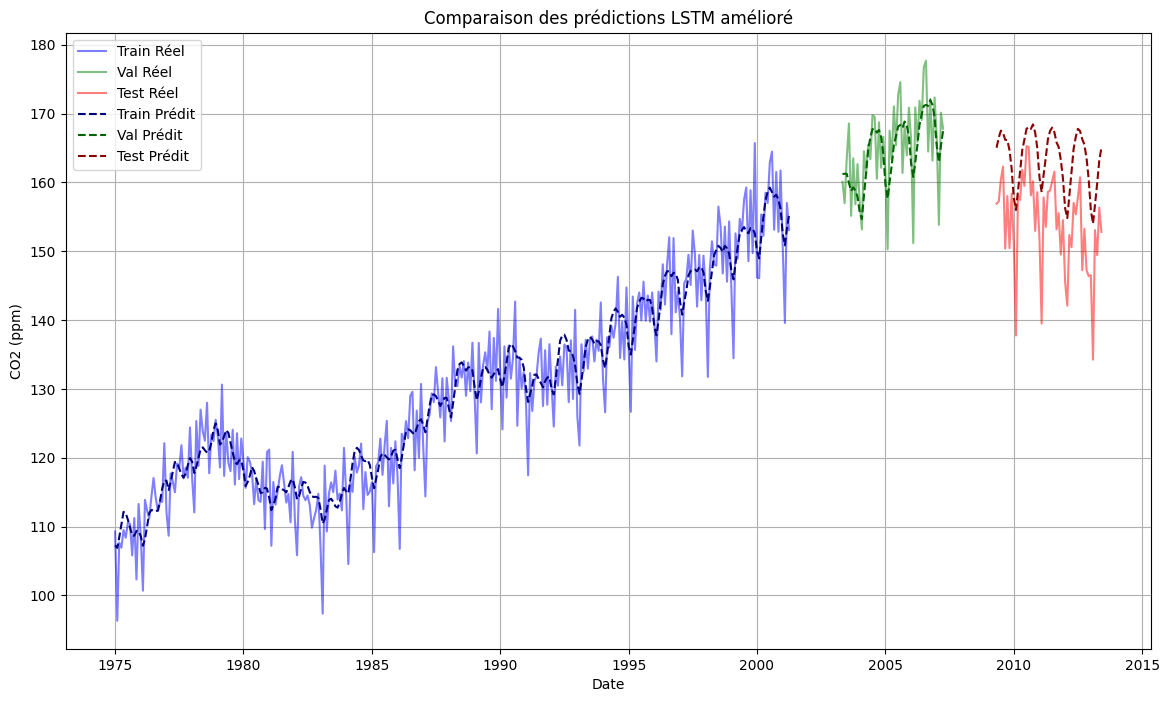

In [2]:
# --- PRÉTRAITEMENT AVANCÉ ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# 1. Chargement et préparation des données
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month')
df.index = pd.to_datetime(df.index)
df.columns = ['CO2']

# 2. Feature Engineering Temporel
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)

# 3. Split temporel
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))
train = df.iloc[:train_size]
val = df.iloc[train_size:train_size+val_size]
test = df.iloc[train_size+val_size:]

# 4. Normalisation multivariée
features = ['CO2', 'sin_month', 'cos_month', 'quarter', 'year']
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[features]), index=train.index, columns=features)
val_scaled = pd.DataFrame(scaler.transform(val[features]), index=val.index, columns=features)
test_scaled = pd.DataFrame(scaler.transform(test[features]), index=test.index, columns=features)

# --- MODÈLE LSTM AMÉLIORÉ ---
# 5. Paramètres modèles
n_steps = 24  # 2 ans de contexte historique
n_features = len(features)  # 5 features

# 6. Création des séquences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data.iloc[i:i+n_steps].values)
        y.append(data.iloc[i+n_steps]['CO2'])  # Prédiction uniquement du CO2
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, n_steps)
X_val, y_val = create_sequences(val_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

# 7. Architecture du modèle
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_steps, n_features)),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

# 8. Configuration de l'entraînement
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 9. Entraînement avec chronométrage
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)
training_time = time.time() - start_time

# --- ÉVALUATION ET VISUALISATION ---
# 10. Prédictions et conversion des échelles
def inverse_scale(y, y_pred):
    dummy = np.zeros((len(y), len(features)))
    dummy[:,0] = y
    y_true = scaler.inverse_transform(dummy)[:,0]
    
    dummy[:,0] = y_pred
    y_pred = scaler.inverse_transform(dummy)[:,0]
    
    return y_true, y_pred

def predict_and_evaluate(X, y):
    start = time.time()
    y_pred = model.predict(X, verbose=0).flatten()
    eval_time = time.time() - start
    y_true, y_pred = inverse_scale(y, y_pred)
    return {
        'time': eval_time,
        'mse': mean_squared_error(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred),
        'true': y_true,
        'pred': y_pred
    }

# 11. Calcul des métriques
results = {
    'train': predict_and_evaluate(X_train, y_train),
    'val': predict_and_evaluate(X_val, y_val),
    'test': predict_and_evaluate(X_test, y_test)
}

# 12. Affichage des résultats
print(f"\nTemps d'entraînement : {training_time:.2f}s")
for dataset in ['train', 'val', 'test']:
    print(f"\n{dataset.upper()}:")
    print(f"Temps prédiction : {results[dataset]['time']:.2f}s")
    print(f"MSE: {results[dataset]['mse']:.2f}")
    print(f"MAE: {results[dataset]['mae']:.2f}")
    print(f"R²: {results[dataset]['r2']:.2f}")

# 13. Visualisation comparative corrigée
plt.figure(figsize=(14, 8))

# Récupération des dates correctes pour chaque ensemble
train_dates = train_scaled.index[n_steps:]
val_dates = val_scaled.index[n_steps:]
test_dates = test_scaled.index[n_steps:]

# Tracé des données réelles
plt.plot(train_dates, results['train']['true'], label='Train Réel', color='blue', alpha=0.5)
plt.plot(val_dates, results['val']['true'], label='Val Réel', color='green', alpha=0.5)
plt.plot(test_dates, results['test']['true'], label='Test Réel', color='red', alpha=0.5)

# Tracé des prédictions
plt.plot(train_dates, results['train']['pred'], '--', label='Train Prédit', color='navy')
plt.plot(val_dates, results['val']['pred'], '--', label='Val Prédit', color='darkgreen')
plt.plot(test_dates, results['test']['pred'], '--', label='Test Prédit', color='darkred')

plt.title('Comparaison des prédictions LSTM amélioré')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/150


C:\Users\L13\AppData\Local\Temp\ipykernel_23876\940667123.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month', dayfirst=False)
C:\Users\L13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 1.8626 - mae: 1.0331 - val_loss: 0.7563 - val_mae: 0.6952
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8495 - mae: 0.6914 - val_loss: 0.7463 - val_mae: 0.6922
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7581 - mae: 0.6519 - val_loss: 0.7445 - val_mae: 0.6911
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5643 - mae: 0.5531 - val_loss: 0.7418 - val_mae: 0.6900
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5189 - mae: 0.5182 - val_loss: 0.7430 - val_mae: 0.6902
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6134 - mae: 0.5785 - val_loss: 0.7416 - val_mae: 0.6888
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4986 - mae: 0.4916 - val_loss: 0.7355 - val_mae: 0.6886
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5076 - mae: 0.5178 - val_loss: 0.7309 - val_mae: 0.6872
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5292 -

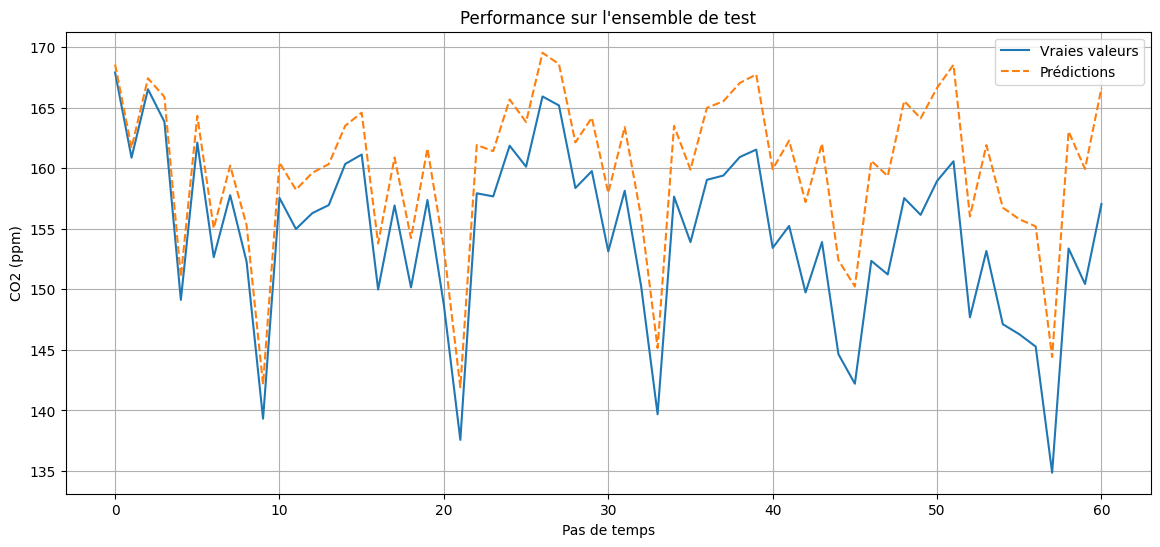

In [14]:
# --- PRÉTRAITEMENT SPÉCIALISÉ CO2 ---
#version avec R²=0.53 sans overfitting 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# 1. Chargement et parsing des dates
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month', dayfirst=False)
df.index = pd.to_datetime(df.index, format='%Y-%b')
df.columns = ['CO2']

# 2. Feature Engineering adapté
df['month'] = df.index.month
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
df.drop('month', axis=1, inplace=True)

# 3. Différenciation pour stationnarité
df['CO2_diff'] = df['CO2'].diff().fillna(0)

# 4. Split temporel strict
train = df.iloc[:int(0.7*len(df))]
val = df.iloc[int(0.7*len(df)):int(0.85*len(df))]
test = df.iloc[int(0.85*len(df)):]

# 5. Normalisation robuste
features = ['CO2_diff', 'sin_month', 'cos_month']
scaler = RobustScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[features]), index=train.index, columns=features)
val_scaled = pd.DataFrame(scaler.transform(val[features]), index=val.index, columns=features)
test_scaled = pd.DataFrame(scaler.transform(test[features]), index=test.index, columns=features)

# --- ARCHITECTURE LSTM OPTIMISÉE ---
n_steps = 12  # Fenêtre annuelle
n_features = len(features)

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data.iloc[i:i+n_steps].values)
        y.append(data.iloc[i+n_steps, 0])  # CO2_diff comme target
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, n_steps)
X_val, y_val = create_sequences(val_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

# 6. Modèle avec régularisation adaptative
model = Sequential([
    LSTM(64, activation='tanh', 
         kernel_regularizer=L1L2(l1=1e-4, l2=1e-3),
         return_sequences=True,
         input_shape=(n_steps, n_features)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, activation='tanh',
         kernel_regularizer=L1L2(l2=1e-3)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1)
])

# 7. Configuration d'entraînement
def lr_schedule(epoch):
    return 0.001 * (0.1 ** (epoch // 30))

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 8. Entraînement
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=24,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)
training_time = time.time() - start_time

# --- ÉVALUATION AVANCÉE ---
def inverse_transform(y_diff, last_values):
    return last_values + y_diff.cumsum()

def evaluate_model(X, y, reference):
    y_pred = model.predict(X, verbose=0).flatten()
    
    # Reconstruction de la série
    y_true_diff = y
    y_pred_diff = y_pred
    
    # Conversion en valeurs absolues
    last_train_values = reference['CO2'].iloc[-len(y)-1:-1].values
    y_true = inverse_transform(y_true_diff, last_train_values)
    y_pred = inverse_transform(y_pred_diff, last_train_values)
    
    return {
        'mse': mean_squared_error(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred),
        'true': y_true,
        'pred': y_pred
    }

# 9. Calcul des métriques
results = {
    'train': evaluate_model(X_train, y_train, train),
    'val': evaluate_model(X_val, y_val, val),
    'test': evaluate_model(X_test, y_test, test)
}

# 10. Affichage des résultats
print(f"\nTemps d'entraînement : {training_time:.2f}s")
for dataset in ['train', 'val', 'test']:
    print(f"\n{dataset.upper()}:")
    print(f"MSE: {results[dataset]['mse']:.2f}")
    print(f"MAE: {results[dataset]['mae']:.2f}")
    print(f"R²: {results[dataset]['r2']:.2f}")

# 11. Visualisation
plt.figure(figsize=(14, 6))
plt.plot(results['test']['true'], label='Vraies valeurs', color='#1f77b4')
plt.plot(results['test']['pred'], label='Prédictions', color='#ff7f0e', linestyle='--')
plt.title('Performance sur l\'ensemble de test')
plt.xlabel('Pas de temps')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\L13\AppData\Local\Temp\ipykernel_23876\689187744.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month', dayfirst=False)
C:\Users\L13\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1.4596 - mae: 0.9057 - val_loss: 0.7503 - val_mae: 0.6957
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6582 - mae: 0.6019 - val_loss: 0.7492 - val_mae: 0.6959
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6573 - mae: 0.5839 - val_loss: 0.7375 - val_mae: 0.6938
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5400 - mae: 0.5306 - val_loss: 0.7403 - val_mae: 0.6954
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6169 - mae: 0.5454 - val_loss: 0.7311 - val_mae: 0.6918
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5192 - mae: 0.5293 - val_loss: 0.7301 - val_mae: 0.6926
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5770 - mae: 0.5528 - val_loss: 0.7232 - val_mae: 0.6926
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4689 - mae: 0.4854 - val_loss: 0.7236 - val_mae: 0.6884
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 12, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,341 (352.90 KB)

 Trainable params: 30,049 (117.38 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 60,100 (234.77 KB)


Nombre total de paramètres: 30,241

Temps d'entraînement total: 42.72 secondes

=== Ensemble TRAIN ===
MSE: 1.7188
MAE: 1.1682
R²: 0.9953
Temps de prédiction: 0.7866 secondes

=== Ensemble VAL ===
MSE: 0.4333
MAE: 0.5727
R²: 0.9926
Temps de prédiction: 0.0940 secondes

=== Ensemble TEST ===
MSE: 20.1616
MAE: 4.0929
R²: 0.6001
Temps de prédiction: 0.0883 secondes



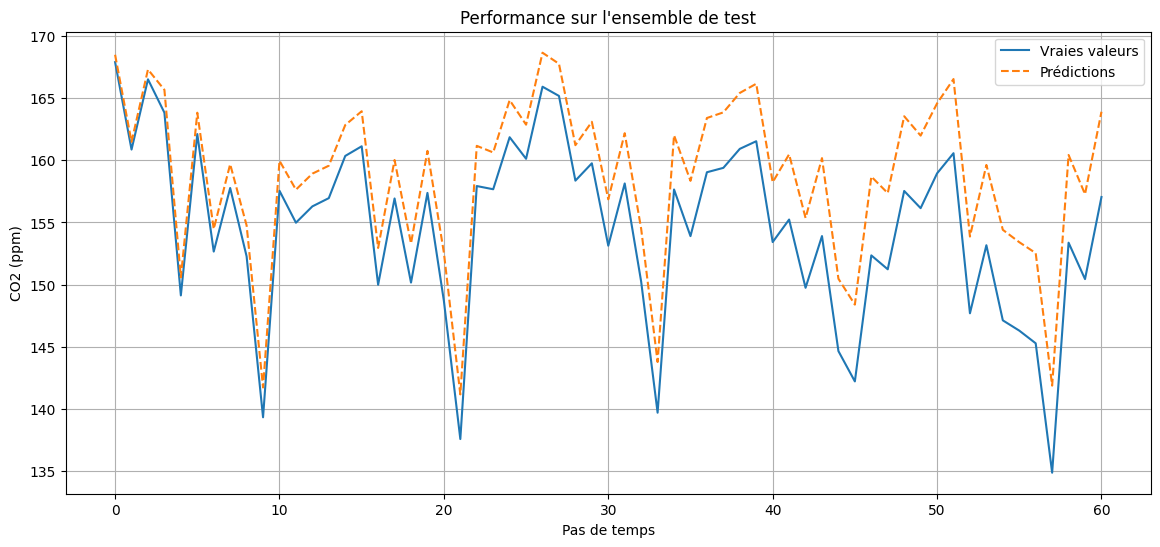

In [15]:
# --- PRÉTRAITEMENT SPÉCIALISÉ CO2 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# 1. Chargement et parsing des dates
df = pd.read_csv('Emission.csv', parse_dates=['Year-Month'], index_col='Year-Month', dayfirst=False)
df.index = pd.to_datetime(df.index, format='%Y-%b')
df.columns = ['CO2']

# 2. Feature Engineering adapté
df['month'] = df.index.month
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
df.drop('month', axis=1, inplace=True)

# 3. Différenciation pour stationnarité
df['CO2_diff'] = df['CO2'].diff().fillna(0)

# 4. Split temporel strict
train = df.iloc[:int(0.7*len(df))]
val = df.iloc[int(0.7*len(df)):int(0.85*len(df))]
test = df.iloc[int(0.85*len(df)):]

# 5. Normalisation robuste
features = ['CO2_diff', 'sin_month', 'cos_month']
scaler = RobustScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[features]), index=train.index, columns=features)
val_scaled = pd.DataFrame(scaler.transform(val[features]), index=val.index, columns=features)
test_scaled = pd.DataFrame(scaler.transform(test[features]), index=test.index, columns=features)

# --- ARCHITECTURE LSTM OPTIMISÉE ---
n_steps = 12  # Fenêtre annuelle
n_features = len(features)

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data.iloc[i:i+n_steps].values)
        y.append(data.iloc[i+n_steps, 0])  # CO2_diff comme target
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, n_steps)
X_val, y_val = create_sequences(val_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

# 6. Modèle avec régularisation adaptative
model = Sequential([
    LSTM(64, activation='tanh', 
         kernel_regularizer=L1L2(l1=1e-4, l2=1e-3),
         return_sequences=True,
         input_shape=(n_steps, n_features)),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, activation='tanh',
         kernel_regularizer=L1L2(l2=1e-3)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1)
])

# 7. Configuration d'entraînement
def lr_schedule(epoch):
    return 0.001 * (0.1 ** (epoch // 30))

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 8. Entraînement
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=24,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)
training_time = time.time() - start_time

# Affichage de l'architecture et paramètres
print("\n" + "="*60)
model.summary()
print(f"\nNombre total de paramètres: {model.count_params():,}")
print("="*60 + "\n")

# --- ÉVALUATION AVANCÉE ---
def inverse_transform(y_diff, last_values):
    return last_values + y_diff.cumsum()

def evaluate_model(X, y, reference):
    start_time = time.time()
    y_pred = model.predict(X, verbose=0).flatten()
    pred_time = time.time() - start_time
    
    # Reconstruction de la série
    y_true_diff = y
    y_pred_diff = y_pred
    
    # Conversion en valeurs absolues
    last_train_values = reference['CO2'].iloc[-len(y)-1:-1].values
    y_true = inverse_transform(y_true_diff, last_train_values)
    y_pred = inverse_transform(y_pred_diff, last_train_values)
    
    return {
        'mse': mean_squared_error(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred),
        'pred_time': pred_time,
        'true': y_true,
        'pred': y_pred
    }

# 9. Calcul des métriques
results = {
    'train': evaluate_model(X_train, y_train, train),
    'val': evaluate_model(X_val, y_val, val),
    'test': evaluate_model(X_test, y_test, test)
}

# 10. Affichage des résultats
print(f"Temps d'entraînement total: {training_time:.2f} secondes\n")
for dataset in ['train', 'val', 'test']:
    res = results[dataset]
    print(f"=== Ensemble {dataset.upper()} ===")
    print(f"MSE: {res['mse']:.4f}")
    print(f"MAE: {res['mae']:.4f}")
    print(f"R²: {res['r2']:.4f}")
    print(f"Temps de prédiction: {res['pred_time']:.4f} secondes\n")

# 11. Visualisation
plt.figure(figsize=(14, 6))
plt.plot(results['test']['true'], label='Vraies valeurs', color='#1f77b4')
plt.plot(results['test']['pred'], label='Prédictions', color='#ff7f0e', linestyle='--')
plt.title('Performance sur l\'ensemble de test')
plt.xlabel('Pas de temps')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()